# Librerias

In [96]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

from scipy.special import hermite
from scipy.special import eval_hermite
from scipy.optimize import curve_fit
from scipy.signal import find_peaks

# Cargamos los datos con el primer potenciometro

In [97]:
def dar_numero(string):
    numero = ''
    for letra in string:
        try:
            float(letra)
            numero += letra
        except:
            pass
    return float(numero)



In [98]:
ruta = 'Mediciones potencia'
archivos = os.listdir(ruta)

files = []
for archivo in archivos:
    if archivo[-4:] == '.txt':
        files.append(archivo)

W_files, I_files = [], []
for file in files[3:]: #--> El primer archivo corresponde a la segunda medicion
    # Guardado de la corriente
    amp = dar_numero(file)
    I_files.append(amp) #A

    # Cargamos los archivos
    df = pd.read_csv(ruta + f'/{file}', sep=" ", header=None)
    wats = df[2][2:] #--> todos los valores

    # Guardamos los valores
    wats_str = np.array([ float(wat[1] + '.' + wat[3:-5]) for wat in wats]) #--> No tengo en cuenta la potencia
    pot_wat = np.array([ float(wat[-3]) for wat in wats])

    W_files.append(wats_str * 10**(-pot_wat)) #W


## Sacamos valores medios y std

In [99]:
I, err_I, W, err_W = [], [], [], []
for i, w in zip(I_files, W_files):
    I.append(np.mean(i)), err_I.append(np.std(i))
    W.append(np.mean(w)), err_W.append(np.std(w))

# Mediciones de potencia sin la cavidad

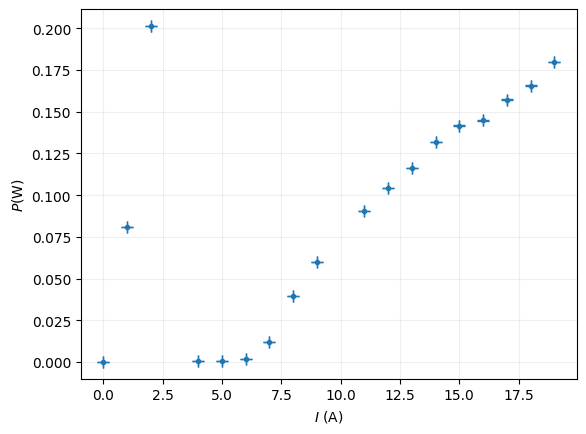

In [100]:
plt.figure()
plt.errorbar(I, W, yerr = err_W, xerr = err_I, fmt = '.', capsize = 4)

plt.xlabel(r'$I$ (A)'), plt.ylabel(r'$P$(W)')

plt.grid(alpha = 0.2)
plt.show()

In [101]:
pot = [0, 0, 0.1e-3, 0.1e-3, 0.2e-3, 0.5e-3, 0.9e-3, 6e-3, 18e-3, 27.0e-3, 31.3e-3, 37.0e-3, 42.9e-3, 44.8e-3, 53.7e-3, 64.3e-3, 74.6e-3, 83.7e-3, 94.6e-3, 105.6e-3, 117.2e-3, 128.6e-3, 141.6e-3, 153.7e-3] #W
a = [0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2, 2.1, 2.2, 2.3] #A
len(a), len(pot)
pd.DataFrame({'I (A)': a, 'P (W)': pot}).to_csv('Mediciones potencia/Datos_potencia_1064_luz_apagada_sin-lasear.csv', index=False)

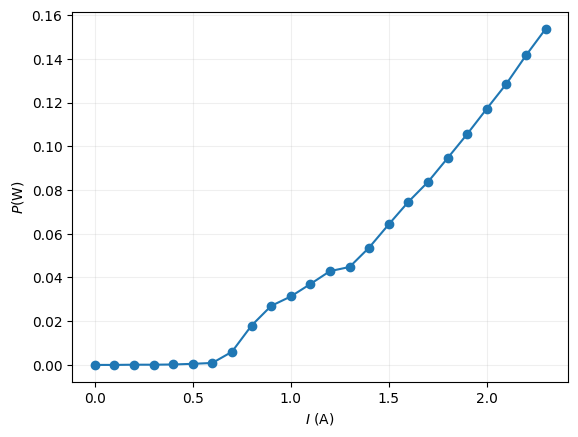

In [102]:
plt.figure(0, )
#plt.errorbar(a, pot, yerr = err_W, xerr = err_I, fmt = '.', capsize = 4)
plt.plot(a, pot, 'o-')
plt.xlabel(r'$I$ (A)'), plt.ylabel(r'$P$(W)')

plt.grid(alpha = 0.2)
plt.show()

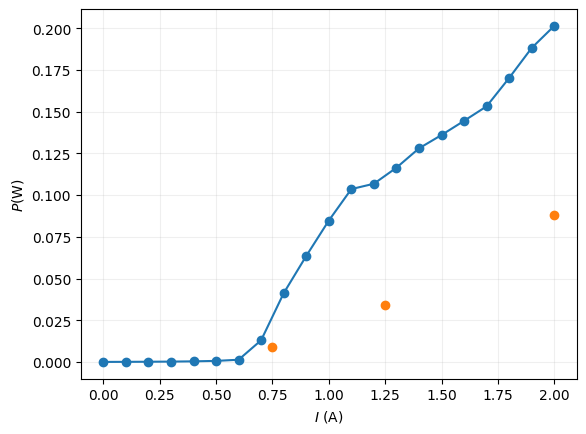

In [103]:
df = pd.read_csv('Mediciones potencia/medicion_completa_slim.csv')
I2, P2 = df['Corriente[A]'], df['Potencia[W]']

df2 = pd.read_csv('Mediciones potencia/Datos_potencia_810.csv')
Ib, Pb = df2['I (A)'], df2['P (W)']

plt.plot(I2, P2, 'o-')
plt.plot(Ib, Pb, 'o')
plt.xlabel(r'$I$ (A)'), plt.ylabel(r'$P$(W)')
plt.grid(alpha = 0.2)
plt.show()

# Mediciones espejo plano con luz apagada

In [104]:
pot_luz_apagada = pd.read_csv('Mediciones potencia/Datos_potencia_1064_luz_apagada.csv')
pot_luz_apagada_sin_lasear = pd.read_csv('Mediciones potencia/Datos_potencia_1064_luz_apagada_sin-lasear.csv')
pot_luz_apagada_rendija = pd.read_csv('Mediciones potencia/Datos_potencia_1064_luz_apagada_rendija.csv')

df = pd.DataFrame({'I(A)':pot_luz_apagada['I (A)'],
                   'Potencia (W)':pot_luz_apagada['P (W)'],
                   'Pototencia sin lasear (W)':pot_luz_apagada_sin_lasear['P (W)'],
                   'Potencia con rendija (W)':pot_luz_apagada_rendija['P (W)']})


df['Potencia sin ruido (W)'] = df['Potencia (W)'] - df['Pototencia sin lasear (W)']
display(df.head(11))


,I(A),Potencia (W),Pototencia sin lasear (W),Potencia con rendija (W),Potencia sin ruido (W)
0,0.0,0.0000,0.0000,0.0000,0.0000
1,0.1,0.0000,0.0000,0.0000,0.0000
2,0.2,0.0001,0.0001,0.0000,0.0000
3,0.3,0.0001,0.0001,0.0000,0.0000
4,0.4,0.0002,0.0002,0.0000,0.0000
5,0.5,0.0004,0.0005,0.0001,-0.0001
6,0.6,0.0010,0.0009,0.0002,0.0001
7,0.7,0.0070,0.0060,0.0010,0.0010
8,0.8,0.0228,0.0180,0.0038,0.0048
9,0.9,0.0300,0.0270,0.0047,0.0030


Parametro de 0 W:
m = 0.0013928571428571425
b = -0.0001607142857142857
---------------
Parametro de la lineal:
m = 0.1610484848484847
b = -0.17478969696969662
---------------
Punto de encuentro:
Potencia = 0.0016842009887933248
Corriente = 1.0937853252875156


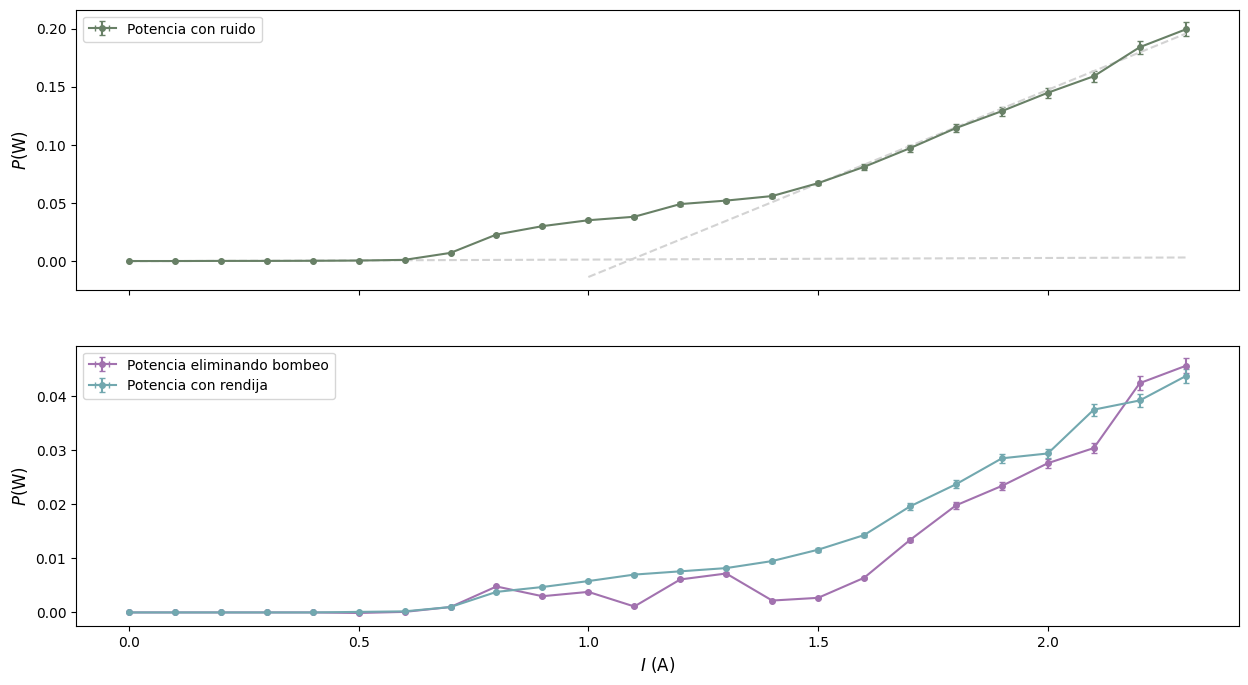

In [105]:
# ---Ajuste---
param1, pcov1 = np.polyfit(df['I(A)'][0:7],df['Potencia (W)'][0:7],1,cov = True)
mod1 = np.polyval(param1,df['I(A)'][0:7]) 
residuos = df['Potencia (W)'][0:7] - mod1

param2, pcov2 = np.polyfit(df['I(A)'][-10:],df['Potencia (W)'][-10:],1,cov = True)
mod2 = np.polyval(param2,df['I(A)'][-10:]) 
residuos = df['Potencia (W)'][-10:] - mod2

# ---Encuentro---
I = (param2[1]-param1[1])/(param1[0]-param2[0])
P = param1[0]*I-param1[1] 

# ---Grafico---
fig,axs = plt.subplots(2,1,sharex=True,figsize=(15,8))

axs[0].errorbar(df['I(A)'], df['Potencia (W)'],np.abs(df['Potencia (W)'])*0.03,0 ,fmt ='o-', label='Potencia con ruido',color = '#688066',capsize = 2,markersize = 4)
axs[0].plot(df['I(A)'],df['I(A)']*param1[0] + param1[1], '--', color = 'lightgrey')
axs[0].plot(df['I(A)'][-14:],df['I(A)'][-14:]*param2[0] + param2[1],'--',color = 'lightgrey')
#axs[0].scatter(I,P,color = 'rosybrown')
axs[0].set_ylabel(r'$P$(W)',fontsize=12)
axs[0].legend()

axs[1].errorbar(df['I(A)'], df['Potencia sin ruido (W)'],np.abs(df['Potencia sin ruido (W)'])*0.03,0, fmt ='o-', label='Potencia eliminando bombeo',color = '#a272af',capsize = 2,markersize = 4)
axs[1].errorbar(df['I(A)'], df['Potencia con rendija (W)'],np.abs(df['Potencia con rendija (W)'])*0.03,0, fmt = 'o-', label='Potencia con rendija',color = '#72a8af',capsize = 2,markersize = 4)
axs[1].set_xlabel(r'$I$ (A)',fontsize=12)
axs[1].set_ylabel(r'$P$(W)',fontsize=12)
axs[1].legend()

# ---Parametros del ajuste---
print('Parametro de 0 W:')
print(f'm = {param1[0]}')
print(f'b = {param1[1]}')
print('---------------')
print('Parametro de la lineal:')
print(f'm = {param2[0]}')
print(f'b = {param2[1]}')
print('---------------')
print('Punto de encuentro:')
print(f'Potencia = {P}')
print(f'Corriente = {I}')

fig.savefig('Figuras Informe/Analisis_potencia_cavidad_lineal.pdf', format = 'pdf')

# Analisis de modos

In [106]:
def read_csv(drive_d, file_d):
    root = drive_d + file_d
    csvs_files = os.listdir(root)

    d, I, name_csv = [], [], []
    for csv in csvs_files:
        df = pd.read_csv(root + f'/{csv}')
        d_i, I_i = df['Distance_(pixels)'], df['Gray_Value']

        d.append(np.array(d_i)), I.append(np.array(I_i)), name_csv.append(csv)

    return d, I, len(csvs_files), name_csv

## Selecciono los mejores modos

In [107]:
folders = os.listdir('Mediciones modos')

for file in folders:
    d_, I_, N, Nombre = read_csv('Mediciones modos/', file)

    fig, axs = plt.subplots(1, N, figsize = (12, 4))
    for k, (D, I, nombre) in enumerate(zip(d_, I_, Nombre)):
        axs[k].plot(D, I, '.')
        axs[k].set_title(nombre)

    plt.show()

PermissionError: [Errno 13] Permission denied: 'Mediciones modos/filtrados/TEM00'

## Análisis de archivos ya filtrados

In [108]:
def I_p(x, x0, w, p):
    xi = (x - x0) * np.sqrt(2) / w
    Hx = eval_hermite(int(p), xi)
    
    return (Hx**2) * np.exp(-2 * ((x - x0) / w)**2)


### Cargo los datos | valores medios y std

In [115]:
def perfiles_intensidad(path):
    csvs = os.listdir(path)
    
    Xi, Ii = [], [] #--> se guardan todas las mediciones de cada carpeta
    for csv in csvs:
        df = pd.read_csv(path + f'/{csv}')
        x, i = df['Distance_(pixels)'].astype(float).to_numpy(), df['Gray_Value'].astype(float).to_numpy()
        Xi.append(x), Ii.append(i)
    
    Xi, Ii = np.array(Xi), np.array(Ii)
    
    # Saco valores medios y std
    mean_Xi, mean_Ii = np.array([np.mean(Xi[:, i]) for i in range(0, len(Xi[0]))]), np.array([np.mean(Ii[:, i]) for i in range(0, len(Ii[0]))])
    err_Xi, err_Ii = np.array([np.std(Xi[:, i]) for i in range(0, len(Xi[0]))]), np.array([np.std(Ii[:, i]) for i in range(0, len(Ii[0]))])
    
    return mean_Xi, err_Xi, mean_Ii, err_Ii

In [116]:
path_filtrados_carpetas = 'Mediciones modos/filtrados'
carpetas_modos = os.listdir(path_filtrados_carpetas)

X, err_X = [], [] #--> Listas que contienen a todas las mediciones de X
I, err_I = [], [] #--> Listas que contienen a todas las mediciones de I
modo = []
for carpeta_modo in carpetas_modos:
    path_ = path_filtrados_carpetas + f'/{carpeta_modo}'
    x_mean, err_x, i_mean, err_i = perfiles_intensidad(path_)
    
    X.append(x_mean), err_X.append(err_x)
    I.append(i_mean), err_I.append(err_i)
    modo.append(int(carpeta_modo[3:]))

### Análisis de picos e intensidades relativas

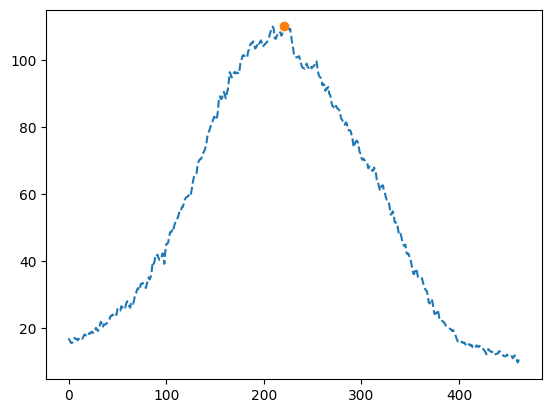

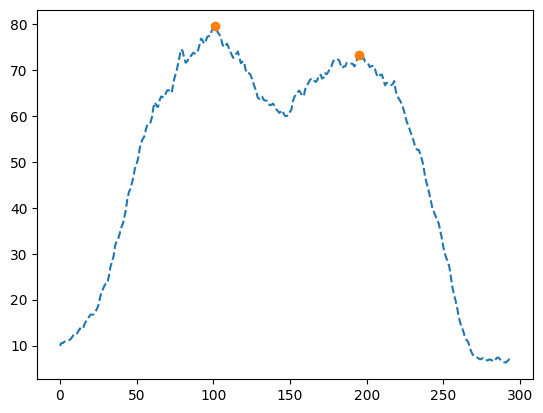

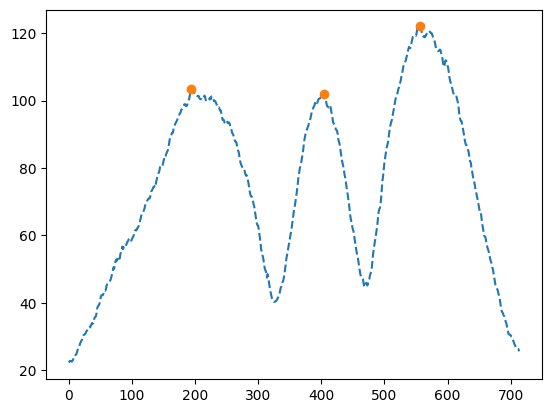

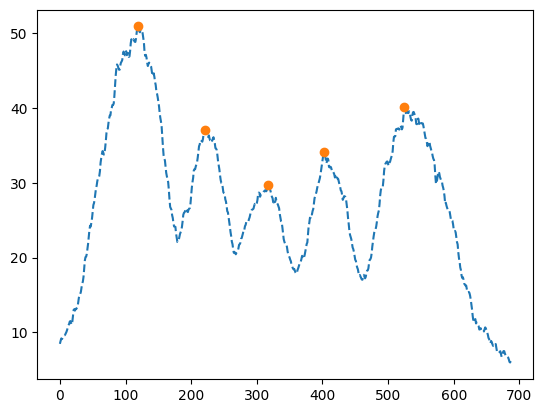

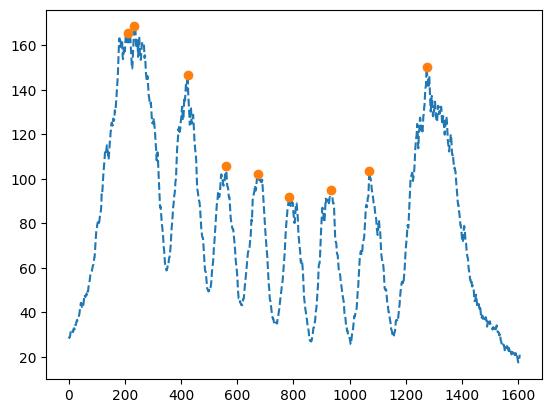

In [117]:
I_rel, I_picos, X_picos = [], [], []
for k in range(0, len(X)):
    xk, ik = X[k], I[k]
    
    peaks, _ = find_peaks(ik, distance = 20, width = 20)
    x_peaks, I_peaks = xk[peaks], ik[peaks]
    I_picos.append(ik[peaks].astype(float))
    X_picos.append(xk[peaks].astype(float))
    
    try:
        I_rel.append(np.diff(I_peaks))
    except:
        I_rel.append(I_peaks)
        
    plt.figure()
    plt.plot(xk, ik, '--')
    plt.plot(x_peaks, I_peaks, 'o')
    plt.show()
    

### Ajuste de los modos p

[100.80465179 218.02755829 207.87030909]


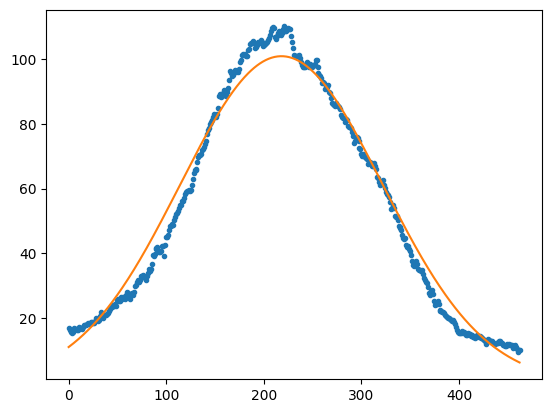

[ 61.61966205 163.43990703  72.07278647]


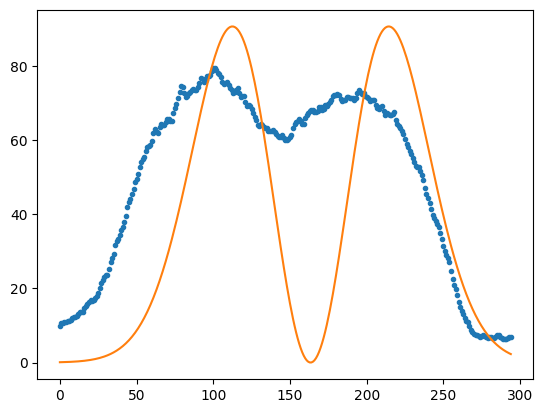

[ 24.81394928 398.4444077  171.80614498]


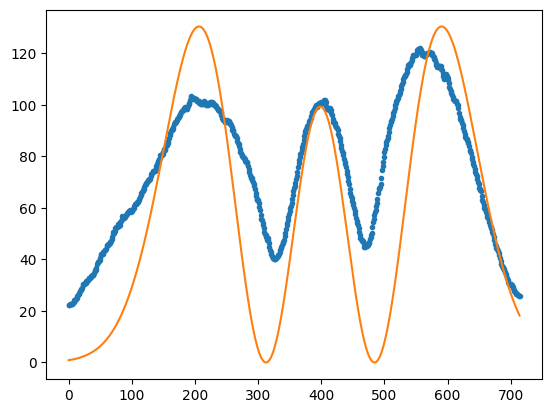

[2.29295968e-01 3.28610335e+02 1.30513379e+02]


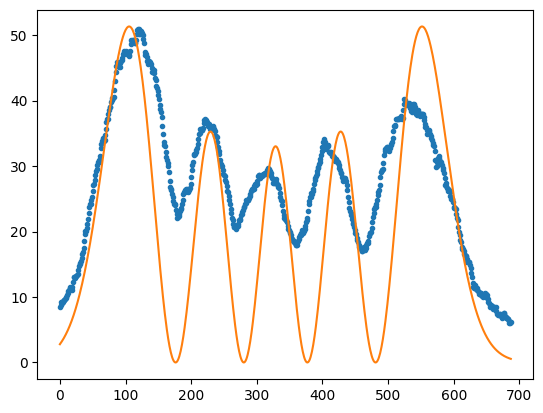

[3.36571054e-04 8.37578098e+02 2.36271066e+02]


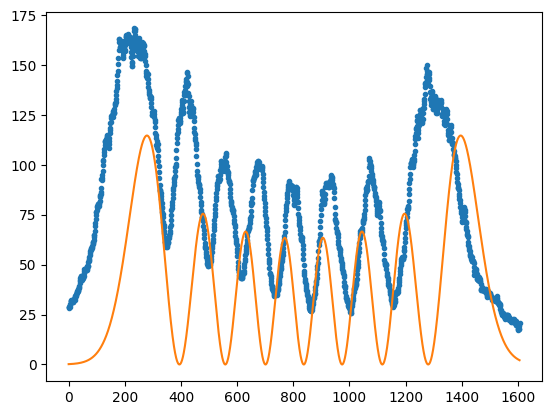

In [118]:
for k in range(0, len(X)):
    
    I_ajuste = lambda x, a, x0, w: a * I_p(x, x0, w, p = p_number)
    
    xk, ik, err_ik = X[k], I[k], err_I[k]
    p_number = modo[k]
    
    popt, pcov = curve_fit(I_ajuste, xk, ik, sigma = err_ik, p0 = [max(ik), np.mean(xk), 150], maxfev = 1_000)
    print(popt)
    
    plt.figure()
    plt.plot(xk, ik, '.')
    plt.plot(xk, I_ajuste(xk, *popt))
    
    plt.show()

### Ajuste por suma de modos

98.91172654104986 +- 10.389049993208236
1.1838500029752903e-09 +- 12.745821007469797
3.1664720344238606e-09 +- 4.5261279597866135
0.06134067871727113 +- 3.9446884864866796
1.108141177151524e-09 +- 2.020188736740419
7.659767168877507e-09 +- 0.3172683566230802
1.6226590494141804e-05 +- 0.013914677871529928
3.4205374719547957e-09 +- 0.0011967630420432684
1.8193212210521767e-06 +- 0.00014750763917311513
9.559461992051698e-08 +- 5.52931123540074e-06
3.221391178878179e-09 +- 7.199070041203602e-08


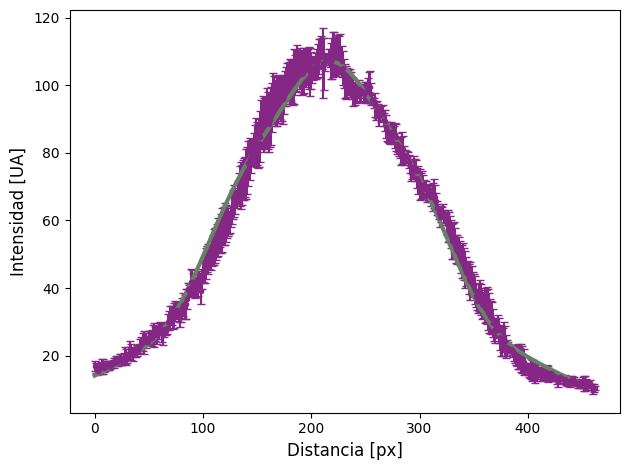

1.0336800057868681e-13 +- 40.255205687233776
6.95324962479404e-14 +- 78.91987906964184
15.446367162126489 +- 110.34830032216185
2.900021013951836e-12 +- 212.7952063096548
2.457686535016056e-16 +- 11.255102406102537
0.0064685736396881575 +- 25.15505272034769
4.077001426252602e-14 +- 4.025850655291202
0.00017977658074055106 +- 0.07305437747617073
7.950487373010427e-12 +- 0.01604793438438499
1.232781390213147e-11 +- 0.0008837613418717023
2.107874064133519e-09 +- 1.262324376829981e-05


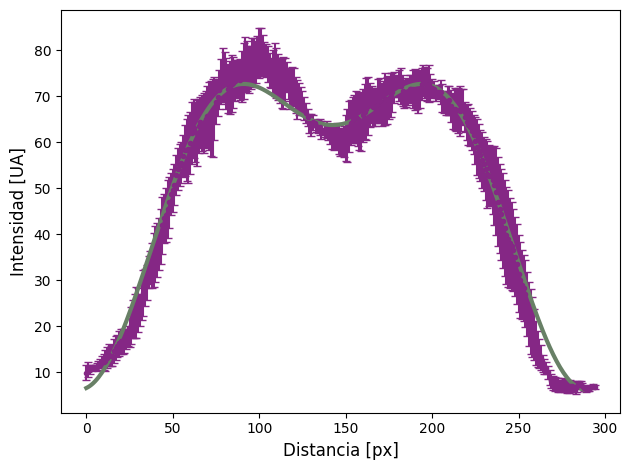

17.74036077388218 +- 0.9159688742562473
1.284342771918604e-19 +- 0.3607286154292954
13.906800375323623 +- 0.16522433909064854
0.9945064841443256 +- 0.027411874754906067
0.13163795476360454 +- 0.004133623823762321
0.005368419257416674 +- 0.00041307489846322893
0.0003127950008620792 +- 3.491021296426161e-05
4.3079426459551665e-05 +- 2.584358763101987e-06
8.578887718570665e-07 +- 1.6180691932055733e-07
1.3467969043366806e-07 +- 8.802872126952322e-09
1.4282573809273265e-30 +- 5.344445550763752e-10


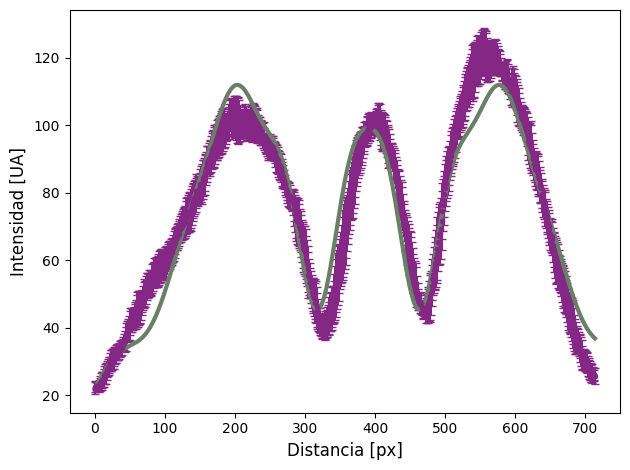

2.062296913827472 +- 0.689810532011642
7.900777188489945 +- 0.5105358174898772
3.156357246180126 +- 0.15413342284316023
0.7689987253278588 +- 0.03961805571250503
3.728237913379746e-33 +- 0.007290829835873145
4.8057904617925646e-27 +- 0.0007860377743506899
0.00015760910809122706 +- 4.223913305421464e-05
1.3165469036358482e-31 +- 3.0357002198324285e-06
1.5511212643050916e-06 +- 6.015412925195499e-07
1.0321619766475394e-34 +- 4.120476350235171e-08
6.577656300334509e-27 +- 1.3236968415108531e-09


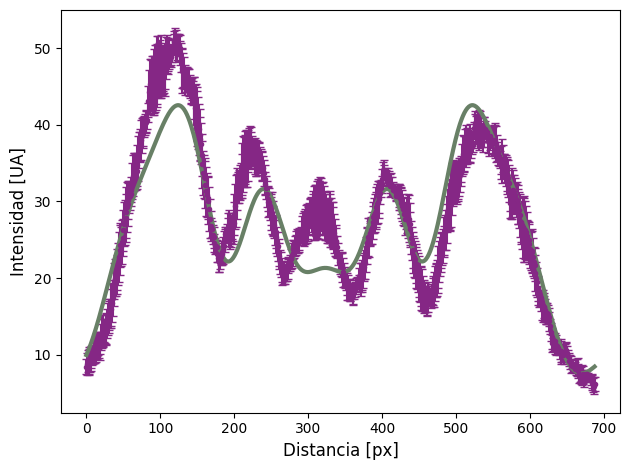

1.6372553051997809e-12 +- 2.4981331336050427
5.387039544927115e-09 +- 1.5623609967714283
1.0957589448522237e-09 +- 0.3928110642762336
2.8204988271054823e-09 +- 0.10751561419201362
0.033688933397960294 +- 0.011313020198984211
0.0013973687530476893 +- 0.0013476372703666048
2.558243980610257e-14 +- 0.00022809455157941168
0.0003636947816857533 +- 1.018056319313114e-05
6.2918231828792635e-06 +- 8.286313604956433e-07
3.429859688954896e-07 +- 3.329426606372899e-08
1.948396566100701e-08 +- 2.2666496617214703e-09


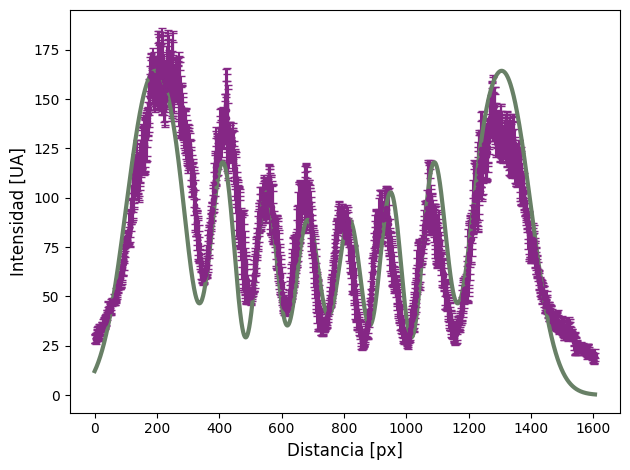

In [130]:
I_ajuste = lambda x, a0, a1, a2, a3, a4, a5, a6, a7, a8, a9, a10, x0, w: a0*I_p(x, x0, w, p = 0) + a1*I_p(x, x0, w, p = 1) + a2*I_p(x, x0, w, p = 2) + a3*I_p(x, x0, w, p = 3) + a4*I_p(x, x0, w, p = 4) + a5*I_p(x, x0, w, p = 5) + a6*I_p(x, x0, w, p = 6) + a7*I_p(x, x0, w, p = 7) + a8*I_p(x, x0, w, p = 8) + a9*I_p(x, x0, w, p = 9) + a10*I_p(x, x0, w, p = 10)
modos = [0, 1, 2, 4, 7]

for k in range(0, len(X)):
    xk, ik, err_ik = X[k], I[k], err_I[k]

    popt, pcov = curve_fit(I_ajuste, xk, ik, sigma = err_ik, p0 = [max(ik), max(ik), max(ik), max(ik), max(ik), max(ik), max(ik), max(ik), max(ik), np.mean(xk), np.mean(xk), np.mean(xk), 160], bounds = (0, np.inf))
    pcov = np.sqrt(np.diag(pcov))
    
    for po, pc in zip(popt[:-2], pcov[:-2]):
        #ai = np.round(po, 1)
        #err_ai = np.round(pc, 1)
        
        ai = po
        err_ai = pc
        print(f'{ai} +- {err_ai}')
    
    plt.figure()
    plt.errorbar(xk, ik, yerr = err_ik,
                 fmt = '.', capsize = 3, color = '#852785', alpha = 1)
    plt.plot(xk, I_ajuste(xk, *popt), color = '#688066', linewidth = 3)
    
    plt.xlabel('Distancia [px]',fontsize = 12)
    plt.ylabel('Intensidad [UA]',fontsize = 12)
    plt.tight_layout()
    
    plt.savefig(f'Figuras Informe/{modos[k]}.pdf')
    
    plt.show()

In [ ]:
def p0s(x_data, y_data, p, ñ = 1.5):
    
    """
    Esta función asume que existen
    dos listas llamadas:
    * I_picos
    * X_picos
    """
    
    i_picos = I_picos[p]
    x_picos = X_picos[p]
    
    w_p0 = (x_picos[-1] - x_picos[0]) / ñ # -> 1.5 es arbitrario
    A_p0 = np.max(y_data)
    x0_p0 = np.mean(x_data)
    
    p0 = [A_p0, x0_p0, w_p0]
    return p0
    

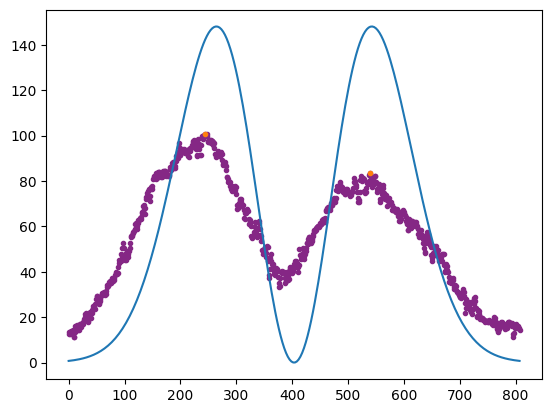

In [ ]:
I = lambda x, a, x0, w: a * I_p(x, x0, w, p = 1)

i_picos = I_picos[1]
x_picos = X_picos[1]

modo = pd.read_csv(f'Mediciones modos/filtrados/tem01-3.csv')
xi, ii = modo['Distance_(pixels)'], modo['Gray_Value']

mitad = max(ii) / 2
puntos_interp = np.interp()


plt.plot(xi, ii, '.',c = '#852785')

x = np.linspace(min(xi), max(xi), 252)
p0 = p0s(xi, ii, 1)
plt.plot(x, I(x, *p0))

plt.plot(x_picos, i_picos, '.')
plt.show()

# Graficos de modos para la presentacion 

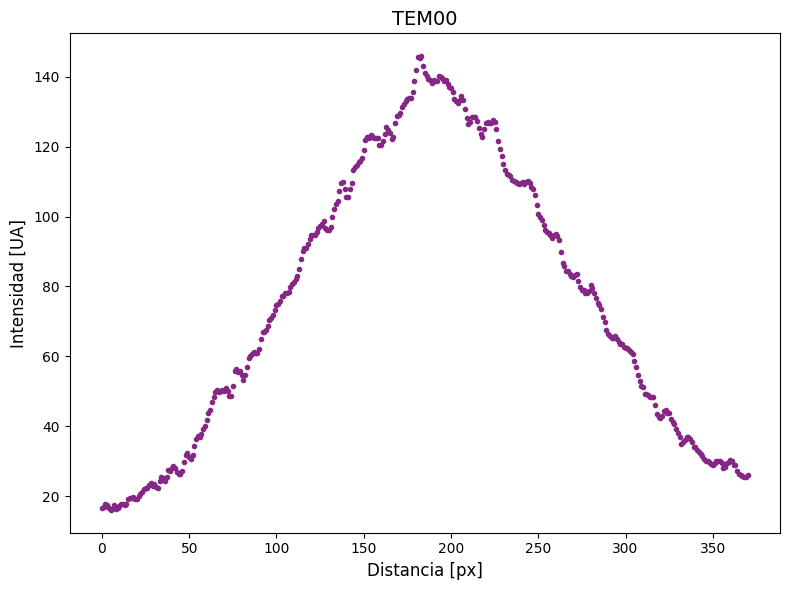

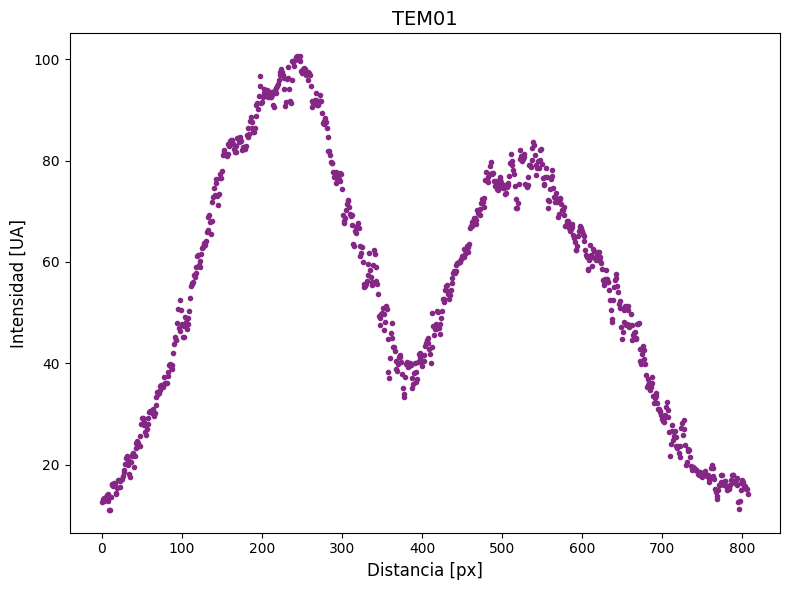

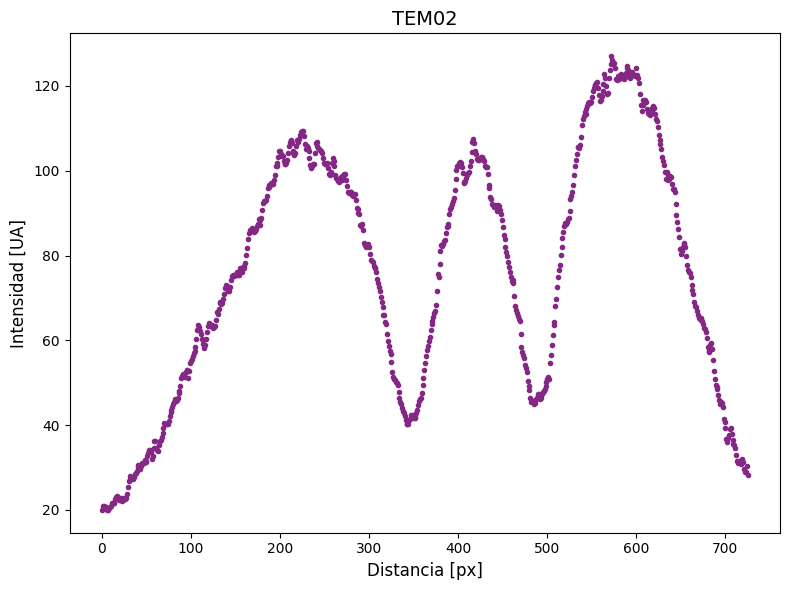

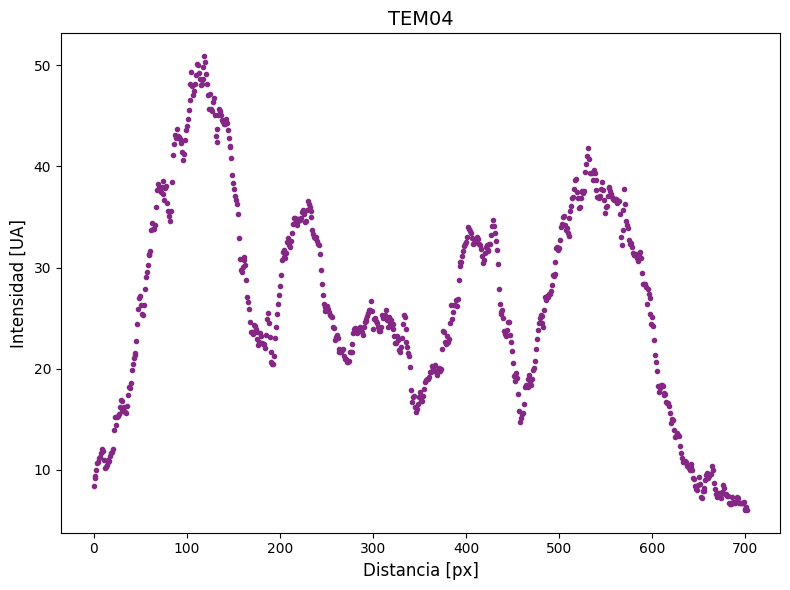

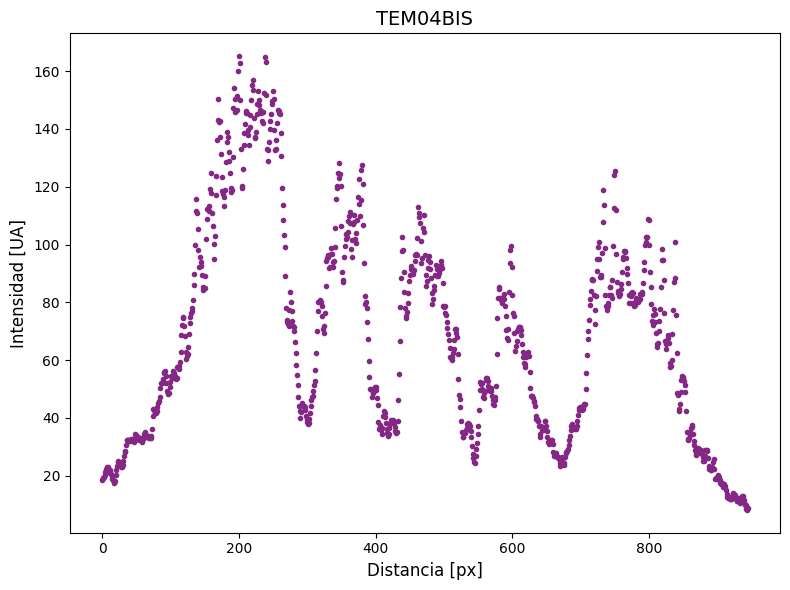

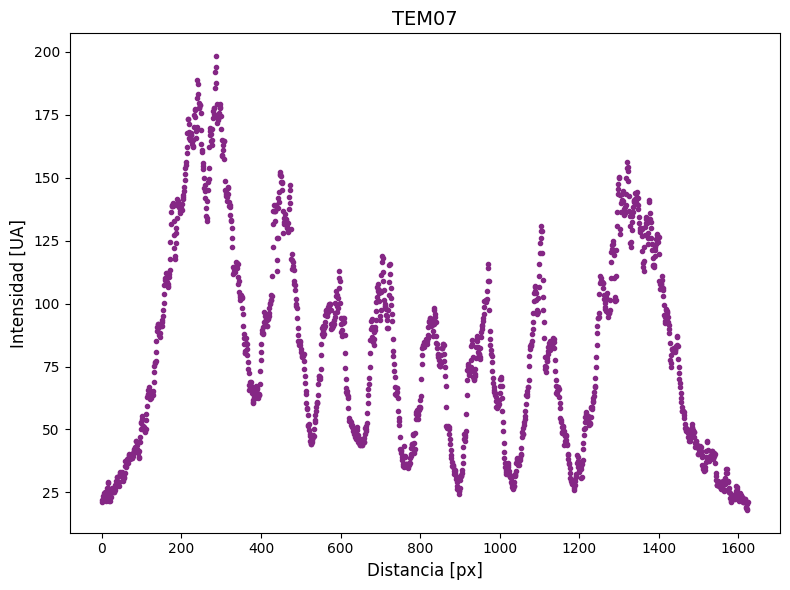

In [ ]:
archivos_filtrados = os.listdir('Mediciones modos/filtrados')

for archivo in archivos_filtrados:
    modo = pd.read_csv(f'Mediciones modos/filtrados/{archivo}')

    plt.figure(figsize = (8,6))
    plt.plot(modo['Distance_(pixels)'], modo['Gray_Value'], '.',c = '#852785')
    plt.xlabel('Distancia [px]',fontsize = 12)
    plt.ylabel('Intensidad [UA]',fontsize = 12)
    plt.title(archivo[:-6].upper(),fontsize = 14)
    plt.tight_layout()
    
    plt.savefig(f'Figuras Informe/{archivo[:-4]}.pdf')